In [305]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [326]:
import csv, functools, operator,os, re
from datetime import datetime
import pandas as pd
import numpy as np 
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [307]:
#Importing the datasets for covid cases in non-US countries 
data_dir = '/Users/jaodand/Dropbox/PostDoc/Jobs:Fellowships/TDI/JHU/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports' # to read all csv files
data_files = functools.reduce(operator.add, [glob(pattern) for pattern in [
    "%s/*.csv*"%data_dir]])

#Sorting the files by dates of generation
data_files.sort(key=lambda f: datetime.strptime(re.split('\.|/',f)[-2], "%m-%d-%Y"))

In [322]:
keys_filenames = [(re.split('\.|/',f)[-2]) for f in data_files]

In [308]:
#Get column names in the latest public datasets from JHU. 
df_exp = pd.read_csv(data_files[-1], sep=',', compression=None, header='infer')
cols = list(df_exp)

In [323]:
df = pd.concat(map(functools.partial(pd.read_csv, sep=',',header='infer'), 
                   data_files),join_axes=[df_exp.columns],keys=keys_filenames)


/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  


In [324]:
#col names for concatenated pdf 
Hdrs = list(df)
Hdrs

['FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key',
 'Incident_Rate',
 'Case_Fatality_Ratio']

In [325]:
df_Ind = df[df['Country_Region'].str.contains("India", na=False)]

df_Ind

FIPS Admin2 Province_State Country_Region  \
03-22-2020 3272   NaN    NaN            NaN          India   
03-23-2020 3322   NaN    NaN            NaN          India   
03-24-2020 3323   NaN    NaN            NaN          India   
03-25-2020 3325   NaN    NaN            NaN          India   
03-26-2020 3324   NaN    NaN            NaN          India   
...               ...    ...            ...            ...   
05-09-2021 281    NaN    NaN        Tripura          India   
           282    NaN    NaN        Unknown          India   
           283    NaN    NaN  Uttar Pradesh          India   
           284    NaN    NaN    Uttarakhand          India   
           285    NaN    NaN    West Bengal          India   

                         Last_Update        Lat      Long_  Confirmed  \
03-22-2020 3272        3/22/20 23:45  20.593684  78.962880      396.0   
03-23-2020 3322  2020-03-23 23:19:21  20.593684  78.962880      499.0   
03-24-2020 3323  2020-03-24 23:37:15  20.593684  78.962880      536.0   
03-25-2020 3325  2020-03-25 23:33:04  20.593684  78.962880      657.0   
03-26-2020 3324  2020-03-26 23:48:18  20.593684  78.962880      727.0   
...                              ...        ...        ...        ...   
05-09-2021 281   2021-05-10 04:20:38  23.746783  91.743565    37692.0   
           282   2021-05-10 04:20:38        NaN        NaN        0.0   
           283   2021-05-10 04:20:38  26.925425  80.560982  1503490.0   
           284   2021-05-10 04:20:38  30.156447  79.197608   244273.0   
           285   2021-05-10 04:20:38  23.814082  87.979803   993159.0   

                  Deaths  Recovered    Active          Combined_Key  \
03-22-2020 3272      7.0       24.0     365.0                 India   
03-23-2020 3322     10.0       34.0     455.0                 India   
03-24-2020 3323     10.0       40.0     486.0                 India   
03-25-2020 3325     12.0       43.0     602.0                 India   
03-26-2020 3324     20.0       45.0     662.0                 India   
...                  ...        ...       ...                   ...   
05-09-2021 281     410.0    34532.0    2750.0        Tripura, India   
           282       0.0        0.0       0.0        Unknown, India   
           283   15464.0  1254045.0  233981.0  Uttar Pradesh, India   
           284    3728.0   166431.0   74114.0    Uttarakhand, India   
           285   12327.0   854805.0  126027.0    West Bengal, India   

                 Incident_Rate Case_Fatality_Ratio  
03-22-2020 3272            NaN                 NaN  
03-23-2020 3322            NaN                 NaN  
03-24-2020 3323            NaN                 NaN  
03-25-2020 3325            NaN                 NaN  
03-26-2020 3324            NaN                 NaN  
...                        ...                 ...  
05-09-2021 281      903.929547             1.08776  
           282             NaN                 NaN  
           283      632.029921             1.02854  
           284     2171.149969             1.52616  
           285      997.054462             1.24119  

[12390 rows x 14 columns]

### Temporal change in Covid cases with time across different provinces

In [331]:
df_exp_Ind = df[df_exp['Country_Region'].str.contains("India", na=False)]

df_exp_Ind

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
249,NaN,NaN,Andaman and Nicobar Islands,India,2021-05-10 04:20:38,11.225999,92.968178,6367,76,6088.0,203.0,"Andaman and Nicobar Islands, India",1526.726709,1.193655
250,NaN,NaN,Andhra Pradesh,India,2021-05-10 04:20:38,15.912900,79.740000,1287603,8707,1088264.0,190632.0,"Andhra Pradesh, India",2388.723471,0.676218
251,NaN,NaN,Arunachal Pradesh,India,2021-05-10 04:20:38,27.768456,96.384277,20165,60,18172.0,1933.0,"Arunachal Pradesh, India",1284.020330,0.297545
252,NaN,NaN,Assam,India,2021-05-10 04:20:38,26.357149,92.830441,292368,1676,253340.0,37352.0,"Assam, India",821.096076,0.573250
253,NaN,NaN,Bihar,India,2021-05-10 04:20:38,25.679658,85.604840,591476,3282,477389.0,110805.0,"Bihar, India",473.939384,0.554883
254,NaN,NaN,Chandigarh,India,2021-05-10 04:20:38,30.733839,76.768278,50207,568,41128.0,8511.0,"Chandigarh, India",4333.894704,1.131316
255,NaN,NaN,Chhattisgarh,India,2021-05-10 04:20:38,21.264705,82.035366,851476,10570,714359.0,126547.0,"Chhattisgarh, India",2892.612169,1.241374
256,NaN,NaN,Dadra and Nagar Haveli and Daman and Diu,India,2021-05-10 04:20:38,20.194742,73.080901,8847,4,7523.0,1320.0,"Dadra and Nagar Haveli and Daman and Diu, India",1436.845080,0.045213
257,NaN,NaN,Delhi,India,2021-05-10 04:20:38,28.646519,77.108980,1323567,19344,1217991.0,86232.0,"Delhi, India",7073.766862,1.461505
258,NaN,NaN,Goa,India,2021-05-10 04:20:38,15.359682,74.057396,118846,1679,85292.0,31875.0,"Goa, India",7492.261623,1.412753


/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


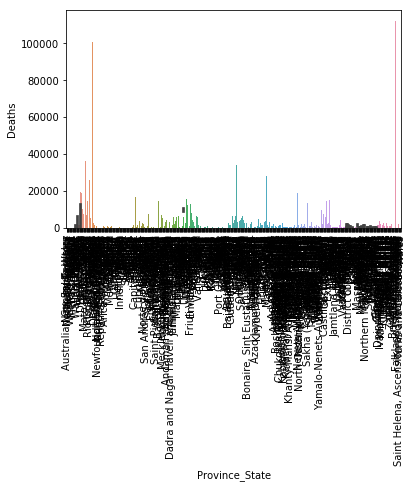

In [327]:
#Lets start with a basic plot for latest data

ax = sns.barplot(x="Province_State", y="Deaths", data=df_exp)

plt.xticks(rotation = 90)
plt.savefig('Statewise.pdf')
plt.show()

In [154]:
color = sns.palplot(len)
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')


animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

In [126]:
fig = plt.figure()
plt.xticks(rotation=90, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')


def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
        
        
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

Index(['FIPS', 'Admin2', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Combined_Key', 'Incident_Rate',
       'Case_Fatality_Ratio'],
      dtype='object')